## Visualize Data Augmentations

Display maximally augmented images using each operation to visualize the effect of each operation.

In [1]:
import os

import matplotlib.pyplot as plt
import monai.transforms as monai_transforms
import torchvision.transforms.v2 as v2
import torchvision.transforms.v2.functional as F
from torchvision.datasets import ImageFolder

DATA_DIR = "../data/busi"
AUGMENTATIONS = {
    "Original": [v2.CenterCrop(224)],
    "R. crop": [v2.RandomCrop(224)],
    "H. flip": [v2.CenterCrop(224), v2.RandomHorizontalFlip(p=1.0)],
    "V. flip": [v2.CenterCrop(224), v2.RandomVerticalFlip(p=1.0)],
    "Rotate": [v2.CenterCrop(224), v2.RandomRotation(degrees=[30, 30])],
    "Translate X": [
        v2.CenterCrop(224),
        v2.Lambda(
            lambda img: F.affine(
                img, angle=0, translate=[0.2 * img.shape[2], 0], scale=1.0, shear=0.0
            )
        ),
    ],
    "Translate Y": [
        v2.CenterCrop(224),
        v2.Lambda(
            lambda img: F.affine(
                img, angle=0, translate=[0, 0.2 * img.shape[1]], scale=1.0, shear=0.0
            )
        ),
    ],
    "Shear X": [v2.CenterCrop(224), v2.RandomAffine(degrees=0, shear=[30.0, 30.0])],
    "Shear Y": [
        v2.CenterCrop(224),
        v2.RandomAffine(degrees=0, shear=[0.0, 0.0, 30.0, 30.0]),
    ],
    "Elastic": [
        v2.CenterCrop(224),
        v2.ElasticTransform(alpha=[50.0, 50.0], sigma=[5.0, 5.0]),
    ],
    "Brightness": [v2.CenterCrop(224), v2.ColorJitter(brightness=[0.5, 0.5])],
    "Contrast": [v2.CenterCrop(224), v2.ColorJitter(contrast=[0.5, 0.5])],
    "Saturation": [v2.CenterCrop(224), v2.ColorJitter(saturation=[0.5, 0.5])],
    "Gauss. blur": [
        v2.CenterCrop(224),
        v2.GaussianBlur(kernel_size=3, sigma=[2.0, 2.0]),
    ],
    "Equalize": [v2.CenterCrop(224), v2.RandomEqualize(p=1.0)],
    "Median blur": [
        v2.CenterCrop(224),
        v2.RandomApply([monai_transforms.MedianSmooth(radius=3)], p=1.0),
    ],
    "Grid dist.": [
        v2.CenterCrop(224),
        monai_transforms.RandGridDistortion(prob=1.0, distort_limit=0.1),
    ],
    "Gauss. noise": [v2.CenterCrop(224), monai_transforms.RandGaussianNoise(prob=1.0)],
    "Scale": [
        v2.CenterCrop(224),
        v2.RandomAffine(degrees=0, scale=[1.2, 1.2]),
    ],  # Sensible range based on prior works
}

/home/developer/workspace/ham10000/.env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/developer/workspace/ham10000/.env/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/developer/workspace/ham10000/.env/

/home/developer/workspace/ham10000/.env/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


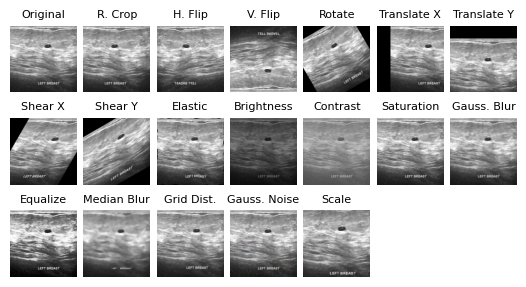

In [32]:
fig, axes = plt.subplots(3, 7, figsize=(6.5393701, 3.6))

for i, augmentation in enumerate(AUGMENTATIONS.keys()):
    train_transform = v2.Compose(
        [v2.ToTensor(), v2.Resize(224, antialias=True)] + AUGMENTATIONS[augmentation]
    )
    train_dataset = ImageFolder(os.path.join(DATA_DIR), transform=train_transform)

    ax = axes.flat[i]
    ax.imshow(train_dataset[0][0].permute(1, 2, 0))
    ax.set_title(augmentation.replace("_", " ").title(), fontsize=8)
    ax.axis("off")

fig.delaxes(axes.flat[-1])
fig.delaxes(axes.flat[-2])
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig("../results/augmentations.pdf", bbox_inches="tight")
plt.show()